<a href="https://colab.research.google.com/github/thudimillasaiprasad/Building-CNN-in-the-Tensorflow-2.0/blob/main/Building_a_CNN_Binary_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation

Step 1: Open up you Jupyter notebook and create a blank Python3 notebook.

Step 2:Import the following Modules.

In [29]:
import numpy as np 
import pandas as pd 
import os
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import random
from zipfile import ZipFile
import os
import shutil
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Lets connect the colab with the g-drive for importing dataset train test.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#lets zip off files and makes path for train and test the fiels

In [3]:
from zipfile import ZipFile
file_name = "/content/gdrive/MyDrive/dogs-vs-cats.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
from zipfile import ZipFile
train_data = "//content/train.zip"

with ZipFile(train_data, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [5]:
from zipfile import ZipFile
file_name = "/content/test1.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [6]:
train_path = "./train"
test_path = "./test1"

# lets define the function for categories list and make a dataframe and review 

In [7]:
filenames = os.listdir(train_path)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(category)
    else:
        categories.append(category)

df = pd.DataFrame({
    'Image': filenames,
    'Category': categories
      })
df.head(-5)

,Image,Category
0,dog.10694.jpg,dog
1,cat.11915.jpg,cat
2,dog.4214.jpg,dog
3,dog.1140.jpg,dog
4,dog.7814.jpg,dog
...,...,...
24990,cat.3750.jpg,cat
24991,dog.8684.jpg,dog
24992,cat.6832.jpg,cat
24993,cat.7656.jpg,cat


#Lets plot the Category columns to vizualised in bar plots

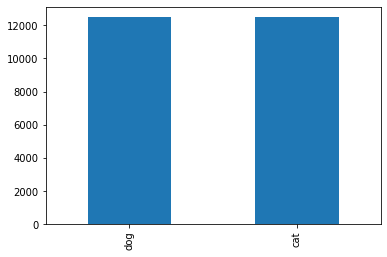

In [8]:
df['Category'].value_counts().plot.bar()

In [9]:
df_train, df_validation = train_test_split(df, test_size=0.1, random_state=18)
df_train = df_train.reset_index(drop=True)
df_validation = df_validation.reset_index(drop=True)

#lets check out the train data, images which are will be random plots for dogs and cats

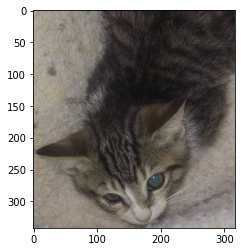

In [10]:
sample = random.choice(df['Image'])
plt.imshow(plt.imread(("./train/"+sample)))

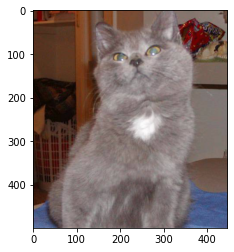

In [11]:
sample = random.choice(df['Image'])
plt.imshow(plt.imread(("./train/"+sample)))

In [12]:

df_train.shape


(22500, 2)

In [13]:
filenames = os.listdir(test_path)
df_test = pd.DataFrame({'Image':filenames})

df_test.head(-5)

,Image
0,3983.jpg
1,1978.jpg
2,8016.jpg
3,9639.jpg
4,9898.jpg
...,...
12490,7810.jpg
12491,6141.jpg
12492,12147.jpg
12493,9486.jpg


# lets setup variables to define size of image and its channel RGB,batch_size,and no epochs .

## lets create objects make data_augmentation on the train data set and make validation for accurate training

In [14]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             width_shift_range=.2, height_shift_range=.2,
                             rotation_range=30,
                             brightness_range=[0.8, 1.2],
                             horizontal_flip=True)

datagenValidation = ImageDataGenerator(rescale=1./255)


In [53]:
X_train = datagen.flow_from_dataframe(
    df_train, 
    directory = train_path, 
    x_col = 'Image',
    y_col = 'Category',
    target_size= (150,150),
    class_mode = 'binary',
    shuffle = True,
    batch_size = 32)

X_validation = datagenValidation.flow_from_dataframe(
    df_validation, 
    directory = train_path, 
    x_col = 'Image',
    y_col = 'Category',
    target_size= (150,150),
    class_mode = 'binary',
    shuffle = True,
    batch_size = 32)

Found 22500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


#Lets define the objects for the test data also when we test with builded model.

In [16]:
X_test = datagenValidation.flow_from_dataframe(
    df_test, 
    directory=test_path, 
    x_col='Image',
    y_col=None,
    class_mode=None,
    target_size= (150,150),
    batch_size=32,
    shuffle=False
)

Found 12500 validated image filenames.


### Defining our CNN Model Layers

## Model 

In [30]:
model = tf.keras.models.Sequential()

## Adding the first CNN layer

CNN layer hyper-parameters:
filters: 32
kernel_size:3
activation: relu
input_shape: (150, 150, 3)

maxpooling_Layer (2,2)

In [31]:
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

Adding 2nd CNN layer 

CNN layer hyper-parameters:
filters: 64
kernel_size:3
activation: relu


maxpooling_Layer (2,2)

In [32]:
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

   Adding 3rd CNN layer
CNN layer hyper-parameters:
filters: 128
kernel_size:3
activation: relu


maxpooling_Layer (2,2)

In [33]:
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

   Adding 4th CNN layer
CNN layer hyper-parameters:
filters: 128
kernel_size:3
activation: relu


maxpooling_Layer (2,2)

In [34]:
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array 

In [35]:
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 

In [36]:
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1

In [37]:
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [38]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
model

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_11 (ModuleWra (None, None, None, 32)    896       
_________________________________________________________________
module_wrapper_12 (ModuleWra (None, None, None, 32)    0         
_________________________________________________________________
module_wrapper_13 (ModuleWra (None, None, None, 64)    18496     
_________________________________________________________________
module_wrapper_14 (ModuleWra (None, None, None, 64)    0         
_________________________________________________________________
module_wrapper_15 (ModuleWra (None, None, None, 128)   73856     
_________________________________________________________________
module_wrapper_16 (ModuleWra (None, None, None, 128)   0         
_________________________________________________________________
module_wrapper_17 (ModuleWra (None, None, None, 128)  

# Training our Model

In [42]:
history = model.fit(X_train, validation_data=X_validation, epochs=20)

Epoch 1/20
704/704 [==============================] - 189s 265ms/step - loss: 0.6854 - accuracy: 0.5392 - val_loss: 0.6557 - val_accuracy: 0.6044
Epoch 2/20
704/704 [==============================] - 186s 264ms/step - loss: 0.6370 - accuracy: 0.6275 - val_loss: 0.5908 - val_accuracy: 0.6820
Epoch 3/20
704/704 [==============================] - 186s 264ms/step - loss: 0.5811 - accuracy: 0.6882 - val_loss: 0.5028 - val_accuracy: 0.7560
Epoch 4/20
704/704 [==============================] - 185s 263ms/step - loss: 0.5413 - accuracy: 0.7244 - val_loss: 0.4528 - val_accuracy: 0.7960
Epoch 5/20
704/704 [==============================] - 185s 263ms/step - loss: 0.5007 - accuracy: 0.7574 - val_loss: 0.4150 - val_accuracy: 0.8084
Epoch 6/20
704/704 [==============================] - 185s 263ms/step - loss: 0.4682 - accuracy: 0.7785 - val_loss: 0.3914 - val_accuracy: 0.8308
Epoch 7/20
704/704 [==============================] - 184s 262ms/step - loss: 0.4311 - accuracy: 0.8022 - val_loss: 0.3598 -

In [47]:
#As you can see our model has a training accuracy of 89% which is nearly 90% and validation accuracy of 93% which is not bad.

#Using our model to make Predictions

In [49]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("DOG",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("CAT",fontsize=30)

# Here below shows the numbers for cat and Dog

In [55]:
X_train.class_indices

{'cat': 0, 'dog': 1}

In [59]:
label = np.where(y_pred=="Cat", 0, 1)
label

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [58]:
y_pred = np.where(y_pred > .5, "Dog", "Cat")
y_pred

array([['Cat'],
       ['Cat'],
       ['Dog'],
       ...,
       ['Dog'],
       ['Cat'],
       ['Dog']], dtype='<U3')

### Lets some figure to check in smaller dimensions

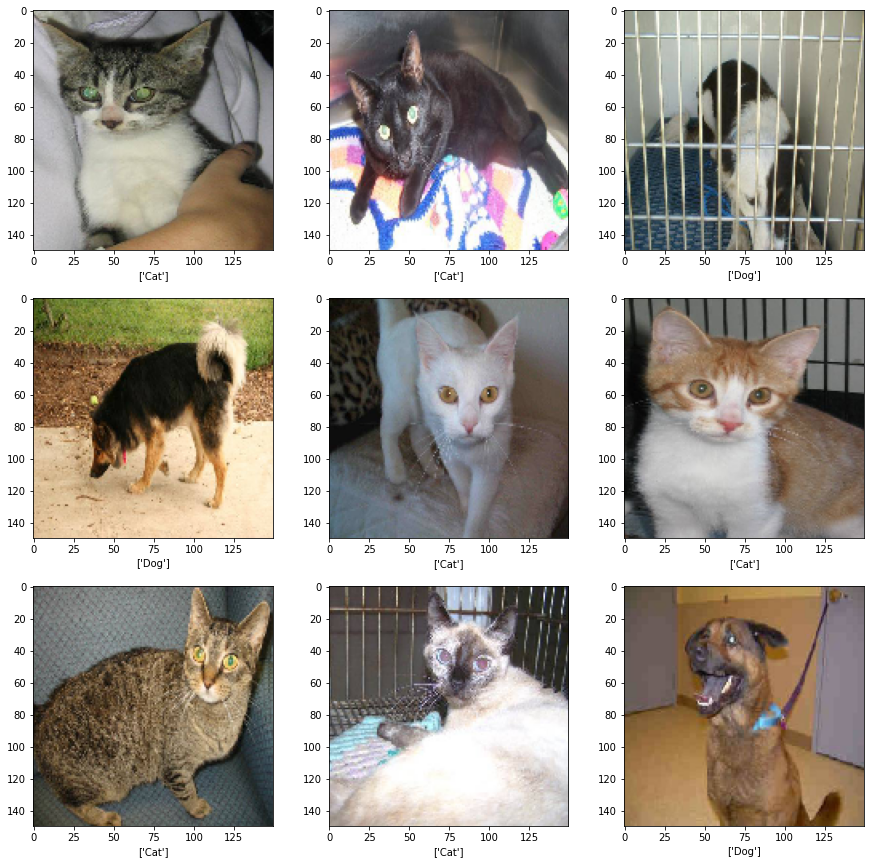

In [60]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[0][i])
    plt.xlabel(y_pred[i])
    
plt.show()